In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image

from sklearn import tree
from os import system

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
credit_df = pd.read_csv("credit.csv")
credit_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [3]:
credit_df.shape

(1000, 17)

In [4]:
credit_df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_duration     1000 non-null object
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null object
housing                 1000 non-null object
existing_loans_count    1000 non-null int64
job                     1000 non-null object
dependents              1000 non-null int64
phone                   1000 non-null object
default                 1000 non-null object
dtypes: int64(7), object(10)
memory usage: 132.9+ KB


In [6]:
for feature in credit_df.columns:
    if credit_df[feature].dtype == 'object':
        credit_df[feature]  = pd.Categorical(credit_df[feature])
credit_df.head(5)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [7]:
print(credit_df.checking_balance.value_counts())
print(credit_df.credit_history.value_counts())
print(credit_df.purpose.value_counts())
print(credit_df.savings_balance.value_counts())
print(credit_df.employment_duration.value_counts())
print(credit_df.other_credit.value_counts())
print(credit_df.housing.value_counts())
print(credit_df.job.value_counts())
print(credit_df.phone.value_counts())

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64
none     814
bank     139
store     47
Name: other_credit, dtype: int64
own      713
rent     179
other    108
Name: housing, dtype: int64
skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64
no     596
yes    404
Name: phone, dtype: int64


In [8]:
replace_struc = {
    "checking_balance": { "unknown": 0, "< 0 DM" : -1, "1 - 200 DM":1, "> 200 DM":2},
    "credit_history": { "good": 3, "critical" : 1, "poor":2, "very good":4, "perfect":5},
    "savings_balance": { "< 100 DM": 1, "100 - 500 DM" : 3, "500 - 1000 DM":7.5, "> 1000 DM":13, "unknown":0},
    "employment_duration": { "< 1 year": 1, "1 - 4 years" : 3, "4 - 7 years":5.5, "> 7 years":10, "unemployed":0},
    "phone": { "no": 1, "yes" : 2},
    "default": { "no": 0, "yes" : 1},
}
oneHotCols = ["purpose", "housing", "other_credit", "job"]

In [9]:
credit_df = credit_df.replace(replace_struc)
credit_df = pd.get_dummies(credit_df, columns = oneHotCols)
credit_df.head(10)

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,-1,6,1,1169,0.0,10.0,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,1,48,3,5951,1.0,3.0,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,0,12,1,2096,1.0,5.5,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,-1,42,3,7882,1.0,5.5,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,-1,24,2,4870,1.0,3.0,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0
5,0,36,3,9055,0.0,3.0,2,4,35,1,...,1,0,0,0,1,0,0,0,0,1
6,0,24,3,2835,7.5,10.0,3,4,53,1,...,0,1,0,0,1,0,0,1,0,0
7,1,36,3,6948,1.0,3.0,2,2,35,1,...,0,0,1,0,1,0,1,0,0,0
8,0,12,3,3059,13.0,5.5,2,4,61,1,...,0,1,0,0,1,0,0,0,0,1
9,1,30,1,5234,1.0,0.0,4,2,28,2,...,0,1,0,0,1,0,1,0,0,0


In [10]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
checking_balance                1000 non-null int64
months_loan_duration            1000 non-null int64
credit_history                  1000 non-null int64
amount                          1000 non-null int64
savings_balance                 1000 non-null float64
employment_duration             1000 non-null float64
percent_of_income               1000 non-null int64
years_at_residence              1000 non-null int64
age                             1000 non-null int64
existing_loans_count            1000 non-null int64
dependents                      1000 non-null int64
phone                           1000 non-null int64
default                         1000 non-null int64
purpose_business                1000 non-null uint8
purpose_car                     1000 non-null uint8
purpose_car0                    1000 non-null uint8
purpose_education               1000 non-null uint8
purpos

In [11]:
x = credit_df.drop("default", axis = 1)
y = credit_df.pop("default")

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [13]:
d_tree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
d_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [14]:
print(d_tree.score(x_train, y_train))
print(d_tree.score(x_test, y_test))

1.0
0.6566666666666666


In [15]:
train_char_label = ["no", "yes"]
Credit_Tree_File = open("credit_tree.dot", "w")
dot_data = tree.export_graphviz(d_tree, out_file = Credit_Tree_File, feature_names = list(x_train), class_names = list(train_char_label))
Credit_Tree_File.close()

In [16]:
retCode = system("dot - Tpng credit_tree.dot -o credit_tree.png")
if (retCode > 0):
    print("Failed" + str(retCode))
else:
    display(Image("credit_tree.png"))

Failed1


In [17]:
d_tree_R = DecisionTreeClassifier(criterion = "gini", max_depth = 3, random_state = 1)
d_tree_R.fit (x_train, y_train)
print (d_tree_R.score(x_train,y_train))
print (d_tree_R.score(x_test,y_test))

0.7585714285714286
0.7233333333333334


In [18]:
train_char_label = ["no", "yes"]
Credit_Tree_File = open("credit_tree.dot", "w")
dot_data = tree.export_graphviz(d_tree_R, out_file = Credit_Tree_File, feature_names = list(x_train), class_names = list(train_char_label))
Credit_Tree_File.close()

In [19]:
retCode = system("dot - Tpng credit_tree.dot -o credit_tree.png")
if (retCode > 0):
    print("Failed" + str(retCode))
else:
    display(Image("credit_tree.png"))

Failed1


In [20]:
print (pd.DataFrame(d_tree_R.feature_importances_,columns = ["Imp"], index = x_train.columns))

                                   Imp
checking_balance              0.601550
months_loan_duration          0.110975
credit_history                0.000000
amount                        0.110832
savings_balance               0.000000
employment_duration           0.000000
percent_of_income             0.000000
years_at_residence            0.000000
age                           0.000000
existing_loans_count          0.000000
dependents                    0.000000
phone                         0.000000
purpose_business              0.000000
purpose_car                   0.000000
purpose_car0                  0.000000
purpose_education             0.000000
purpose_furniture/appliances  0.000000
purpose_renovations           0.000000
housing_other                 0.000000
housing_own                   0.000000
housing_rent                  0.000000
other_credit_bank             0.051769
other_credit_none             0.000000
other_credit_store            0.000000
job_management           

0.7233333333333334


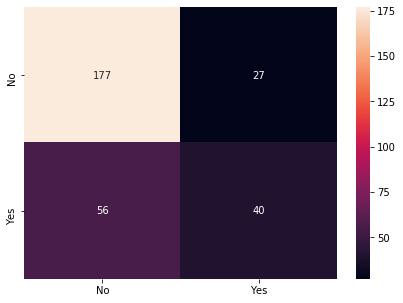

In [21]:
print(d_tree_R.score (x_test, y_test))
y_pred = d_tree_R.predict(x_test)
cm = confusion_matrix(y_test, y_pred, labels = [0,1])
df_cm = pd.DataFrame(cm, index = ["No", "Yes"], columns = ["No", "Yes"])
plt.figure (figsize = (7,5))
sns.heatmap(df_cm, annot = True, fmt = "g")

In [22]:
from sklearn.ensemble import bagging, AdaBoostClassifier
ada_boost = AdaBoostClassifier(base_estimator=d_tree, n_estimators=50, random_state = 1)
ada_boost.fit(x_train, y_train)

C:\Users\abhijit.a.pande\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [23]:
from sklearn.ensemble import BaggingClassifier
bag_ = BaggingClassifier(base_estimator=d_tree, n_estimators=100, random_state = 1)
bag_.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=1,
   

0.76


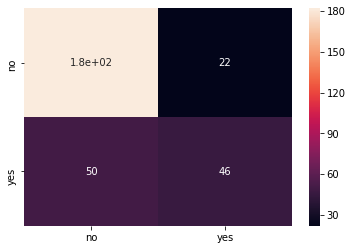

In [24]:
y_pred = bag_.predict(x_test)
print(bag_.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred, labels = [0,1])
df_cm = pd.DataFrame(cm, columns = ["no","yes"], index = ["no","yes"])
sns.heatmap(df_cm,annot = True)

0.6866666666666666


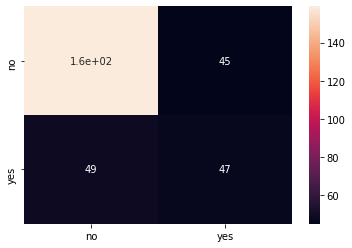

In [25]:
y_pred = ada_boost.predict(x_test)
print(ada_boost.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred, labels = [0,1])
df_cm = pd.DataFrame(cm, columns = ["no","yes"], index = ["no","yes"])
sns.heatmap(df_cm,annot = True)

In [26]:
ada_boost = AdaBoostClassifier(n_estimators=100, random_state = 1)
ada_boost.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=1)

0.7233333333333334


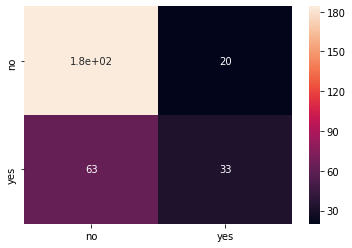

In [27]:
y_pred = ada_boost.predict(x_test)
print(ada_boost.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred, labels = [0,1])
df_cm = pd.DataFrame(cm, columns = ["no","yes"], index = ["no","yes"])
sns.heatmap(df_cm,annot = True)

0.7466666666666667


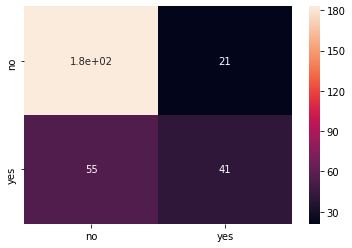

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
grb_ = GradientBoostingClassifier(n_estimators=100, random_state = 1)
grb_.fit(x_train, y_train)
y_pred = grb_.predict(x_test)
print(grb_.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred, labels = [0,1])
df_cm = pd.DataFrame(cm, columns = ["no","yes"], index = ["no","yes"])
sns.heatmap(df_cm,annot = True)

0.76


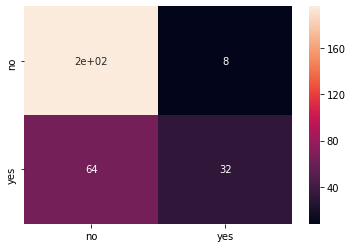

In [29]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state = 1, max_features = 6)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
print(random_forest.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred, labels = [0,1])
df_cm = pd.DataFrame(cm, columns = ["no","yes"], index = ["no","yes"])
sns.heatmap(df_cm,annot = True)

In [34]:
ada_boost.predict_proba(x_test)
bag_.predict_proba(x_test)
grb_.predict_proba(x_test)
random_forest.predict_proba(x_test)

array([[0.48, 0.52],
       [0.92, 0.08],
       [0.77, 0.23],
       [0.79, 0.21],
       [0.37, 0.63],
       [0.67, 0.33],
       [0.93, 0.07],
       [0.87, 0.13],
       [0.72, 0.28],
       [0.98, 0.02],
       [0.86, 0.14],
       [0.84, 0.16],
       [0.96, 0.04],
       [0.62, 0.38],
       [0.79, 0.21],
       [0.73, 0.27],
       [0.83, 0.17],
       [0.86, 0.14],
       [0.83, 0.17],
       [0.91, 0.09],
       [0.24, 0.76],
       [0.64, 0.36],
       [0.79, 0.21],
       [0.85, 0.15],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.3 , 0.7 ],
       [0.71, 0.29],
       [0.83, 0.17],
       [0.99, 0.01],
       [0.62, 0.38],
       [0.91, 0.09],
       [0.97, 0.03],
       [0.66, 0.34],
       [0.43, 0.57],
       [0.66, 0.34],
       [0.66, 0.34],
       [0.75, 0.25],
       [0.94, 0.06],
       [0.72, 0.28],
       [0.8 , 0.2 ],
       [0.34, 0.66],
       [0.41, 0.59],
       [0.46, 0.54],
       [0.5 , 0.5 ],
       [0.79, 0.21],
       [0.92, 0.08],
       [0.94,